<a href="https://colab.research.google.com/github/RafaelCaballero/BME/blob/main/mfia/proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto 3

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

def dia_semana(df):
  df["Date"] = df.index
  filtro_fecha = df.Date.dt.year >= 2011
  df = df[filtro_fecha].copy()
  df["Year"] = df.Date.dt.year
  df['Day_of_Week'] = df['Date'].dt.day_name()
  return df

# Definir los símbolos de Yahoo Finance, incluyendo General Electric y Visa
symbols = {
    'USD/JPY': 'JPY=X',
    'EUR/USD': 'EURUSD=X',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    'Pfizer': 'PFE',
    'Nvidia': 'NVDA',
    'Tesla': 'TSLA',
    'General Electric': 'GE',
    'Visa': 'V'
}

# Descargar los datos de todos los símbolos
data = yf.download(list(symbols.values()), period="max")

# Filtrar para quedarnos solo con la columna 'Adj Close'
df = data['Close'].dropna()

# Nombres inteligibles
symbol_renames = {v: k for k, v in symbols.items()} # diccionario inverso
df = df.rename(columns=symbol_renames)

df_rend = df.pct_change().dropna()

# Añadir una columna con el día de la semana
df = dia_semana(df)
df_rend = dia_semana(df_rend)

# Guardar los datos en un archivo CSV si es necesario
#df.to_csv('close_varios.csv', index=False)


[*********************100%***********************]  9 of 9 completed


In [6]:
df

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week
Date,,,,,,,,,,,,
2011-01-03,9.211000,1.335791,65.457253,15.051911,81.123001,0.362674,9.425335,1.774667,15.882468,2011-01-03,2011,Monday
2011-01-04,9.250500,1.335684,66.638916,14.996370,81.669998,0.361528,9.590600,1.778000,15.900495,2011-01-04,2011,Tuesday
2011-01-05,9.371000,1.332108,66.746338,15.169467,82.038002,0.389267,9.654572,1.788667,16.236065,2011-01-05,2011,Wednesday
2011-01-06,9.293000,1.315686,66.459862,15.279800,83.189003,0.443141,9.691892,1.858667,16.479307,2011-01-06,2011,Thursday
2011-01-07,9.274500,1.297993,65.994392,15.353024,83.300003,0.455520,9.777190,1.882667,16.432009,2011-01-07,2011,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,206.649994,1.135332,247.479996,169.029999,143.815002,137.380005,23.459999,342.690002,365.320007,2025-06-02,2025,Monday
2025-06-03,205.710007,1.145344,248.869995,166.179993,142.451996,141.220001,23.350000,344.269989,365.859985,2025-06-03,2025,Tuesday
2025-06-04,207.229996,1.138446,250.880005,168.050003,143.837006,141.919998,23.389999,332.049988,368.000000,2025-06-04,2025,Wednesday


In [8]:
df_rend

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week
Date,,,,,,,,,,,,
2011-01-03,0.023444,0.004261,-0.000547,0.017476,-0.004381,0.027273,0.009708,-0.000375,0.001990,2011-01-03,2011,Monday
2011-01-04,0.004288,-0.000080,0.018052,-0.003690,0.006743,-0.003160,0.017534,0.001878,0.001135,2011-01-04,2011,Tuesday
2011-01-05,0.013026,-0.002678,0.001612,0.011543,0.004506,0.076728,0.006670,0.005999,0.021104,2011-01-05,2011,Wednesday
2011-01-06,-0.008324,-0.012328,-0.004292,0.007273,0.014030,0.138398,0.003865,0.039135,0.014982,2011-01-06,2011,Thursday
2011-01-07,-0.001991,-0.013447,-0.007004,0.004792,0.001334,0.027936,0.008801,0.012912,-0.002870,2011-01-07,2011,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,0.008000,-0.002203,0.006384,-0.015780,0.000250,0.016651,-0.001277,-0.010881,0.000356,2025-06-02,2025,Monday
2025-06-03,-0.004549,0.008819,0.005617,-0.016861,-0.009477,0.027952,-0.004689,0.004611,0.001478,2025-06-03,2025,Tuesday
2025-06-04,0.007389,-0.006022,0.008077,0.011253,0.009723,0.004957,0.001713,-0.035495,0.005849,2025-06-04,2025,Wednesday


In [7]:
df_rend

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week
Date,,,,,,,,,,,,
2011-01-03,0.023444,0.004261,-0.000547,0.017476,-0.004381,0.027273,0.009708,-0.000375,0.001990,2011-01-03,2011,Monday
2011-01-04,0.004288,-0.000080,0.018052,-0.003690,0.006743,-0.003160,0.017534,0.001878,0.001135,2011-01-04,2011,Tuesday
2011-01-05,0.013026,-0.002678,0.001612,0.011543,0.004506,0.076728,0.006670,0.005999,0.021104,2011-01-05,2011,Wednesday
2011-01-06,-0.008324,-0.012328,-0.004292,0.007273,0.014030,0.138398,0.003865,0.039135,0.014982,2011-01-06,2011,Thursday
2011-01-07,-0.001991,-0.013447,-0.007004,0.004792,0.001334,0.027936,0.008801,0.012912,-0.002870,2011-01-07,2011,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,0.008000,-0.002203,0.006384,-0.015780,0.000250,0.016651,-0.001277,-0.010881,0.000356,2025-06-02,2025,Monday
2025-06-03,-0.004549,0.008819,0.005617,-0.016861,-0.009477,0.027952,-0.004689,0.004611,0.001478,2025-06-03,2025,Tuesday
2025-06-04,0.007389,-0.006022,0.008077,0.011253,0.009723,0.004957,0.001713,-0.035495,0.005849,2025-06-04,2025,Wednesday


EStadística descriptiva

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3622 entries, 2011-01-03 to 2025-06-06
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Amazon            3622 non-null   float64       
 1   EUR/USD           3622 non-null   float64       
 2   General Electric  3622 non-null   float64       
 3   Alphabet          3622 non-null   float64       
 4   USD/JPY           3622 non-null   float64       
 5   Nvidia            3622 non-null   float64       
 6   Pfizer            3622 non-null   float64       
 7   Tesla             3622 non-null   float64       
 8   Visa              3622 non-null   float64       
 9   Date              3622 non-null   datetime64[ns]
 10  Year              3622 non-null   int32         
 11  Day_of_Week       3622 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(1), object(1)
memory usage: 353.7+ KB


In [10]:
df.Year.value_counts()

,count
Year,
2020,253
2015,252
2016,252
2021,252
2024,252
2014,252
2011,251
2018,251
2022,251


In [11]:
df.Day_of_Week.value_counts()

,count
Day_of_Week,
Tuesday,743
Wednesday,742
Thursday,732
Friday,729
Monday,676


In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Ticker,,,,,,,,
Amazon,3622.0,79.940915,8.0485,17.161875,74.023502,135.070007,242.059998,63.821112
EUR/USD,3622.0,1.177585,0.959619,1.093216,1.136648,1.255008,1.484406,0.11051
General Electric,3622.0,88.816675,26.741682,58.918037,80.520279,109.401474,255.630005,40.0111
Alphabet,3622.0,67.773536,11.827339,27.486216,52.670187,104.811525,206.142593,49.300276
USD/JPY,3622.0,112.845556,75.739998,102.612751,110.0485,121.262999,161.606995,20.542387
Nvidia,3622.0,18.154899,0.260887,0.461907,4.157143,16.330542,149.416245,33.883471
Pfizer,3622.0,24.70435,9.162868,18.698537,24.375744,29.497506,51.624905,8.614636
Tesla,3622.0,91.39216,1.455333,13.278333,19.844,195.875835,479.859985,114.30388
Visa,3622.0,133.034234,15.567165,50.93329,116.944183,206.202072,370.220001,89.201274


In [16]:
numericas = ['Amazon', 'EUR/USD', 'General Electric', 'Alphabet', 'USD/JPY',
       'Nvidia', 'Pfizer', 'Tesla', 'Visa']

df[numericas].corr()

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa
Ticker,,,,,,,,,
Amazon,1.000000,-0.578731,0.087536,0.950154,0.692161,0.741615,0.696297,0.868792,0.964535
EUR/USD,-0.578731,1.000000,-0.163135,-0.602934,-0.767343,-0.397284,-0.675535,-0.486546,-0.659454
General Electric,0.087536,-0.163135,1.000000,0.251392,0.426440,0.604206,-0.268867,0.133620,0.158744
Alphabet,0.950154,-0.602934,0.251392,1.000000,0.805036,0.832082,0.682762,0.917145,0.957696
USD/JPY,0.692161,-0.767343,0.426440,0.805036,1.000000,0.728231,0.591082,0.675562,0.796323
Nvidia,0.741615,-0.397284,0.604206,0.832082,0.728231,1.000000,0.243944,0.698117,0.773325
Pfizer,0.696297,-0.675535,-0.268867,0.682762,0.591082,0.243944,1.000000,0.687208,0.711833
Tesla,0.868792,-0.486546,0.133620,0.917145,0.675562,0.698117,0.687208,1.000000,0.848873
Visa,0.964535,-0.659454,0.158744,0.957696,0.796323,0.773325,0.711833,0.848873,1.000000


In [20]:
numericas = ['Amazon', 'EUR/USD', 'General Electric', 'Alphabet', 'USD/JPY',
       'Nvidia', 'Pfizer', 'Tesla', 'Visa']
df_rend[numericas].describe().T*100

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
Amazon,362200.0,0.108963,2.077080,-14.049438,-0.901164,0.093814,1.188378,15.745693
EUR/USD,362200.0,-0.002849,0.532905,-2.775173,-0.305497,-0.004009,0.298023,3.175612
General Electric,362200.0,0.057767,2.008475,-15.159208,-0.845823,0.033733,0.936526,14.729931
Alphabet,362200.0,0.083141,1.741647,-11.634147,-0.755298,0.093664,0.941471,16.258419
USD/JPY,362200.0,0.017378,0.590513,-3.724951,-0.302051,0.025270,0.327631,3.819609
Nvidia,362200.0,0.207884,2.921035,-18.755862,-1.223621,0.167990,1.633769,29.806721
Pfizer,362200.0,0.034887,1.384793,-7.734648,-0.650308,0.000000,0.714334,10.855201
Tesla,362200.0,0.206576,3.627160,-21.062824,-1.632807,0.119736,1.940902,24.395076
Visa,362200.0,0.098773,1.535755,-13.547190,-0.662234,0.135624,0.860807,14.997345


In [21]:
filtro = df_rend.Year>=2025

df_rend[numericas][filtro].describe().T*100

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
Amazon,10600.0,0.004878,2.483745,-8.979129,-1.361012,-0.059104,1.305254,11.977032
EUR/USD,10600.0,0.087774,0.639014,-1.437754,-0.266583,-0.041179,0.473987,2.791944
General Electric,10600.0,0.431945,2.308179,-11.096310,-0.514984,0.436601,1.661712,10.568583
Alphabet,10600.0,-0.053356,2.322801,-7.292372,-1.363149,-0.044465,1.520619,9.682108
USD/JPY,10600.0,-0.081809,0.734098,-2.477634,-0.573139,-0.110339,0.425559,1.713166
Nvidia,10600.0,0.138191,4.185709,-16.968165,-1.949815,0.254972,2.963332,18.722740
Pfizer,10600.0,-0.073728,1.638808,-5.434337,-1.154124,0.078067,1.074491,3.635545
Tesla,10600.0,-0.172473,5.011210,-15.426207,-3.035351,-0.391124,2.555994,22.689990
Visa,10600.0,0.164306,1.539411,-7.737411,-0.402094,0.214426,0.827940,7.837283


In [23]:
df_rend["EUR/USD"].min()*100

-2.7751725571960706

Precio máximo y mínimo absoluto y fechas

In [24]:
df["EUR/USD"].idxmin()

Timestamp('2022-09-28 00:00:00')

In [25]:
df.loc[ df["EUR/USD"].idxmin() ]

,2022-09-28
Ticker,
Amazon,118.010002
EUR/USD,0.959619
General Electric,39.664215
Alphabet,99.573952
USD/JPY,144.690994
Nvidia,12.722317
Pfizer,38.335678
Tesla,287.809998
Visa,175.439331


In [27]:
df.loc[ [df["EUR/USD"].idxmax()] ]

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week
Date,,,,,,,,,,,,
2011-04-29,9.7905,1.484406,73.73439,13.551328,81.529999,0.458501,11.296815,1.84,17.629599,2011-04-29,2011,Friday


In [28]:
dfmax = df.loc[ [df["EUR/USD"].idxmax()] ]
dfmin = df.loc[ [df["EUR/USD"].idxmin()] ]

pd.concat([dfmax,dfmin])

Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week
Date,,,,,,,,,,,,
2011-04-29,9.790500,1.484406,73.734390,13.551328,81.529999,0.458501,11.296815,1.840000,17.629599,2011-04-29,2011,Friday
2022-09-28,118.010002,0.959619,39.664215,99.573952,144.690994,12.722317,38.335678,287.809998,175.439331,2022-09-28,2022,Wednesday


<Axes: >

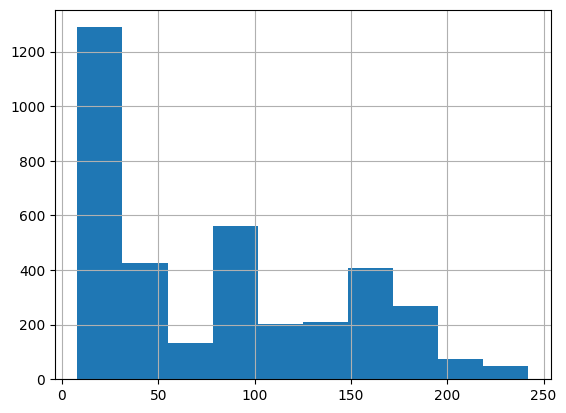

In [29]:
df.Amazon.hist()

<Axes: xlabel='Date'>

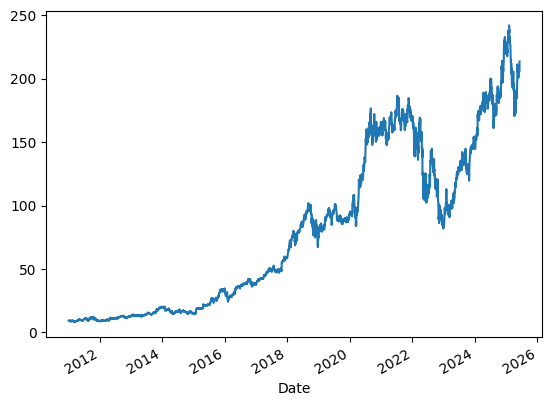

In [30]:
df.Amazon.plot()

<Axes: xlabel='Date'>

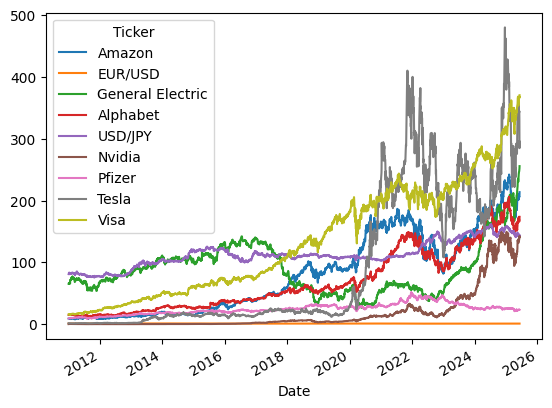

In [31]:
df[numericas].plot()

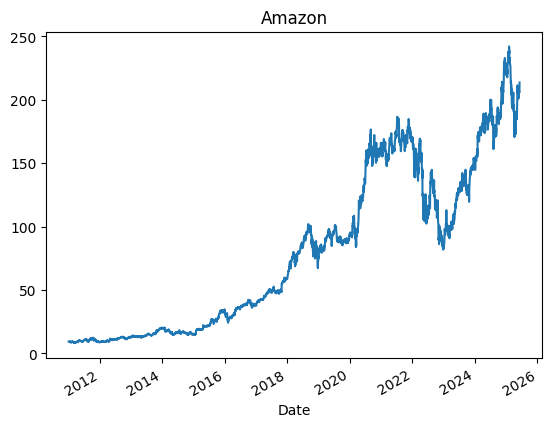

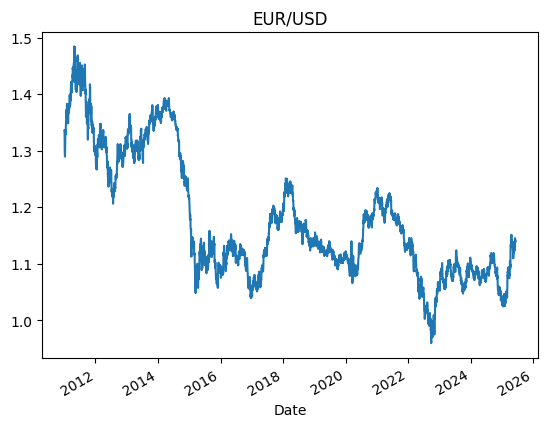

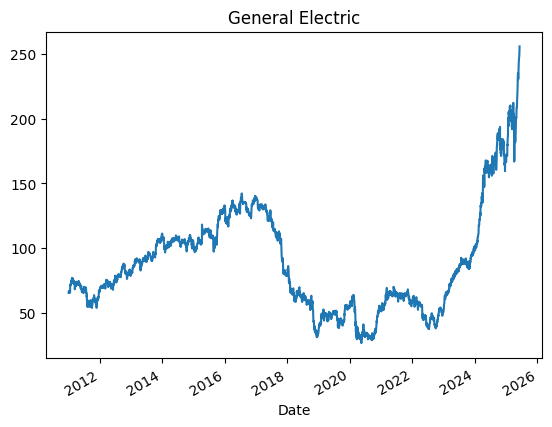

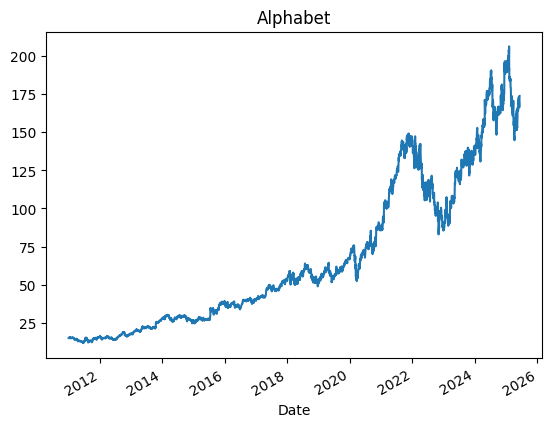

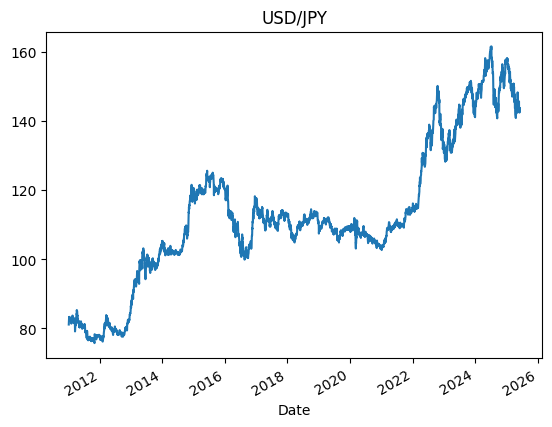

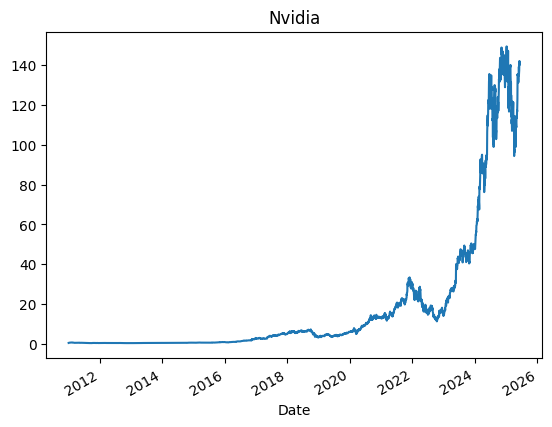

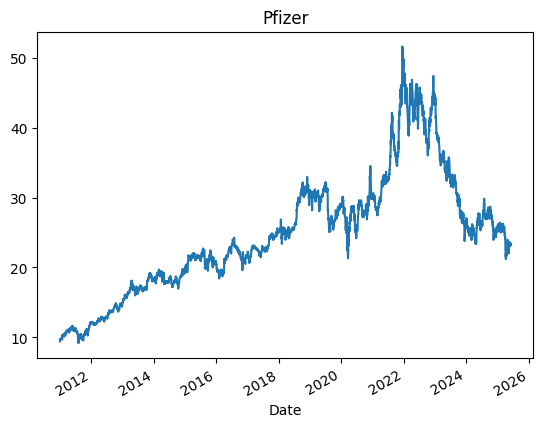

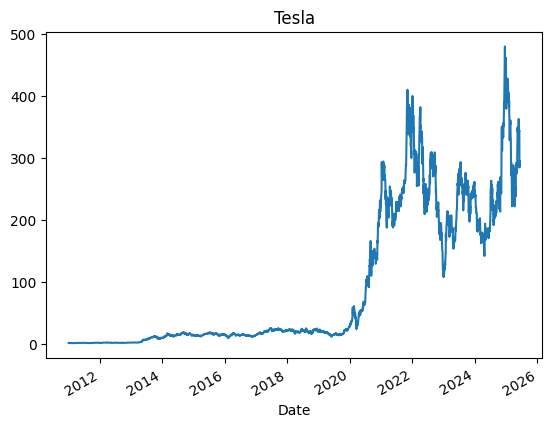

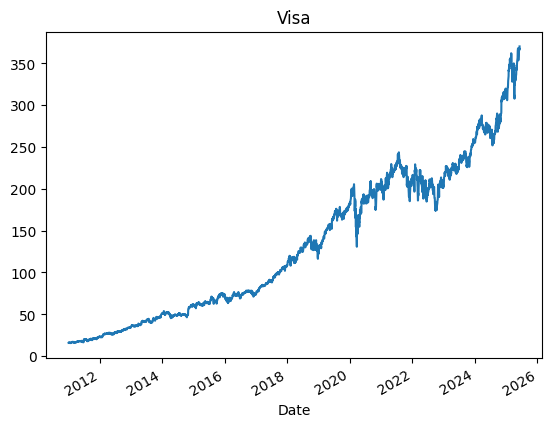

In [34]:
import matplotlib.pyplot as plt
for c in numericas:
  df[c].plot()
  plt.title(c)
  plt.show()


In [35]:
numericas

['Amazon',
 'EUR/USD',
 'General Electric',
 'Alphabet',
 'USD/JPY',
 'Nvidia',
 'Pfizer',
 'Tesla',
 'Visa']

<Axes: >

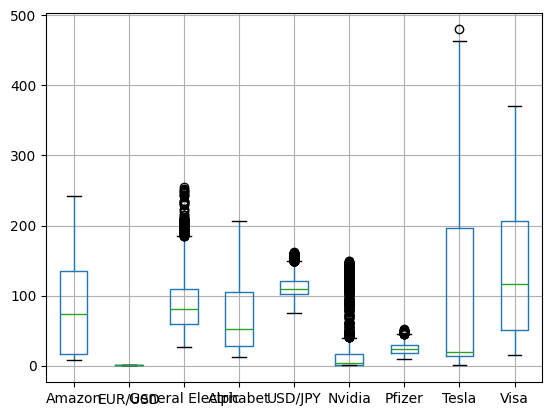

In [36]:
df[numericas].boxplot()

<Axes: >

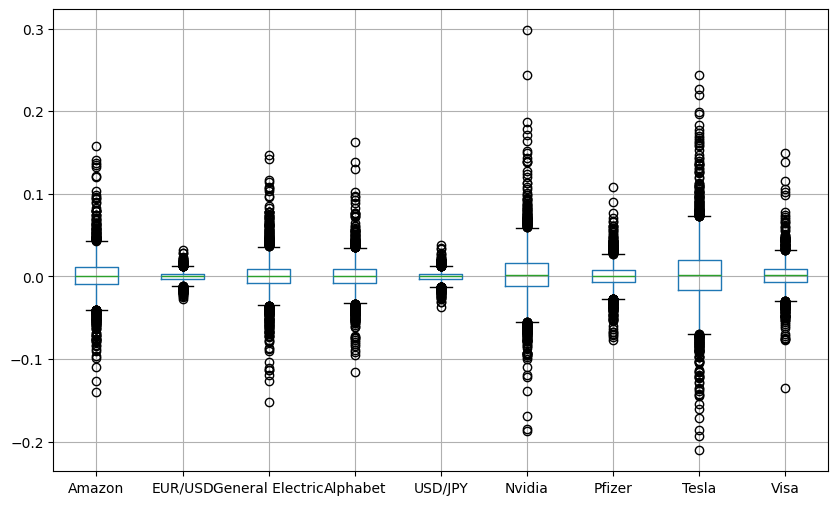

In [38]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
df_rend[numericas].boxplot()

In [ ]:
import plotly.express as px

fig = px.box(df, x="LapTime", y="Driver",  hover_data=['Date'])
fig.show()